In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

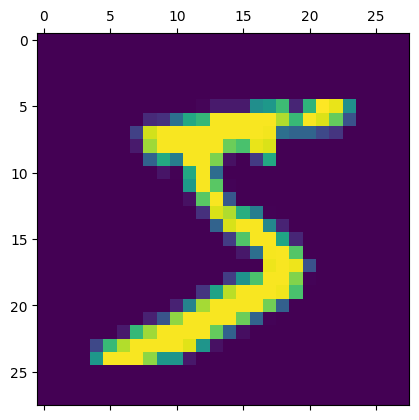

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_trained_flattend = X_train.reshape(len(X_train), 28*28) 
X_test_flattend = X_test.reshape(len(X_test), 28*28) 

X_trained_flattend.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_trained_flattend, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4715 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3046 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2668 - accuracy: 0.9254


In [ ]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9262


[0.26585131883621216, 0.9261999726295471]

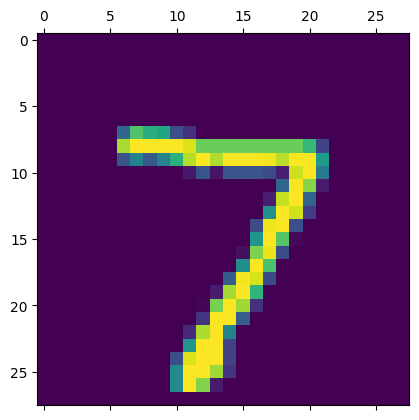

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted = model.predict(X_test_flattend)


313/313 [==============================] - 1s 1ms/step


In [ ]:
y_predicted[0]

array([2.3611531e-02, 4.3896091e-07, 5.4742713e-02, 9.6611220e-01,
       2.2063786e-03, 9.6428968e-02, 1.2920583e-06, 9.9978513e-01,
       9.6981928e-02, 6.4764345e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels)

In [ ]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,   10,  921,   17,    6,    5,   12,    9,   41,    5],
       [   2,    0,   19,  926,    1,   21,    2,    9,   22,    8],
       [   1,    1,    6,    2,  906,    0,   10,    4,   11,   41],
       [   8,    3,    2,   35,   10,  774,   18,    4,   32,    6],
       [   8,    3,    8,    1,    7,   11,  915,    2,    3,    0],
       [   1,    5,   21,   11,    5,    0,    0,  949,    3,   33],
       [   5,    7,    6,   20,    9,   24,    9,   12,  875,    7],
       [  10,    7,    1,    9,   23,    7,    0,   22,    7,  923]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

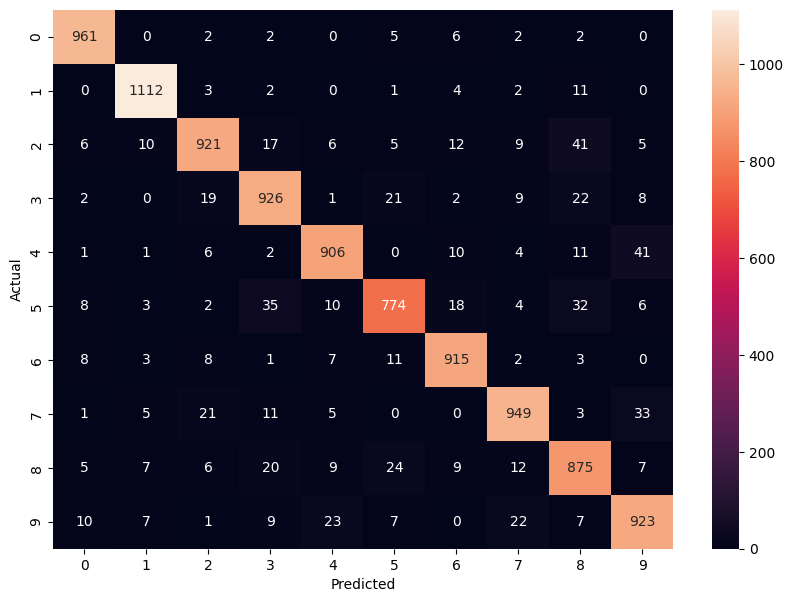

In [ ]:
import seaborn as sns
plt.figure(figsize= (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_trained_flattend, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2718 - accuracy: 0.9231
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1230 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0861 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0520 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0418 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.019

In [ ]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9777


[0.07566346973180771, 0.9776999950408936]